In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
path = "/content/drive/My Drive/PROJECT 1001/Data2/new_jan.csv"
df = pd.read_csv(path)
sns.pairplot(df)

####List attributes/ features

Dataset Source: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236

In [0]:
filenames = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

path = "/content/drive/My Drive/PROJECT 1001/Data2/new_jan.csv"
df = pd.read_csv(path)
common_attrib = set(df.columns)

for name in filenames:
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + name + ".csv"
  df = pd.read_csv(path)
  temp = set(df.columns)
  common_attrib = common_attrib.intersection(temp)

common_attrib

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'AIR_TIME',
 'ARR_DEL15',
 'ARR_DELAY',
 'ARR_DELAY_GROUP',
 'ARR_TIME',
 'CANCELLATION_CODE',
 'CANCELLED',
 'CARRIER_DELAY',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'DEP_DEL15',
 'DEP_DELAY',
 'DEP_DELAY_GROUP',
 'DEP_TIME',
 'DEST',
 'DEST_CITY_NAME',
 'DISTANCE',
 'DIVERTED',
 'DIV_AIRPORT_LANDINGS',
 'DIV_ARR_DELAY',
 'DIV_DISTANCE',
 'FIRST_DEP_TIME',
 'FLIGHTS',
 'FL_DATE',
 'LATE_AIRCRAFT_DELAY',
 'LONGEST_ADD_GTIME',
 'MONTH',
 'NAS_DELAY',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'QUARTER',
 'SECURITY_DELAY',
 'TAXI_OUT',
 'TOTAL_ADD_GTIME',
 'Unnamed: 0',
 'WEATHER_DELAY',
 'WHEELS_OFF',
 'YEAR'}

#### Select a month (any month) for plotting cancellations, delays and diversions


In [0]:
path = "/content/drive/My Drive/PROJECT 1001/Data2/new_dec.csv"
df = pd.read_csv(path)

'\nCode,Description\n"A","Carrier"\n"B","Weather"\n"C","National Air System"\n"D","Security"\n'

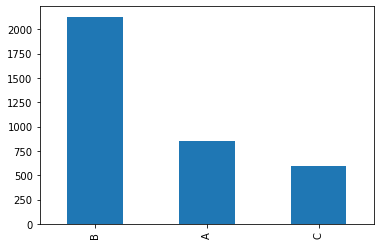

In [0]:
df['CANCELLATION_CODE'].value_counts().plot(kind='bar')
'''
Code,Description
"A","Carrier"
"B","Weather"
"C","National Air System"
"D","Security"
'''

'\nCode,Description\n"-2","Delay < -15 minutes"\n"-1","Delay between -15 and -1 minutes"\n"0","Delay between 0 and 14 minutes"\n"1","Delay between 15 to 29 minutes"\n"2","Delay between 30 to 44 minutes"\n"3","Delay between 45 to 59 minutes"\n"4","Delay between 60 to 74 minutes"\n"5","Delay between 75 to 89 minutes"\n"6","Delay between 90 to 104 minutes"\n"7","Delay between 105 to 119 minutes"\n"8","Delay between 120 to 134 minutes"\n"9","Delay between 135 to 149 minutes"\n"10","Delay between 150 to 164 minutes"\n"11","Delay between 165 to 179 minutes"\n"12","Delay >= 180 minutes"\n'

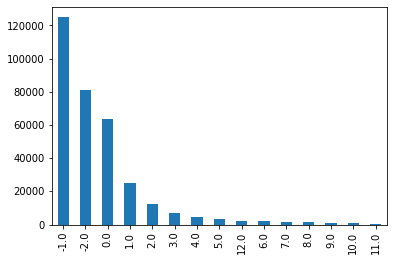

In [0]:
df['ARR_DELAY_GROUP'].value_counts().plot(kind='bar')
'''
Code,Description
"-2","Delay < -15 minutes"
"-1","Delay between -15 and -1 minutes"
"0","Delay between 0 and 14 minutes"
"1","Delay between 15 to 29 minutes"
"2","Delay between 30 to 44 minutes"
"3","Delay between 45 to 59 minutes"
"4","Delay between 60 to 74 minutes"
"5","Delay between 75 to 89 minutes"
"6","Delay between 90 to 104 minutes"
"7","Delay between 105 to 119 minutes"
"8","Delay between 120 to 134 minutes"
"9","Delay between 135 to 149 minutes"
"10","Delay between 150 to 164 minutes"
"11","Delay between 165 to 179 minutes"
"12","Delay >= 180 minutes"
'''

'\nCode,Description\n"0","not diverted"\n"1","diverted"\n'

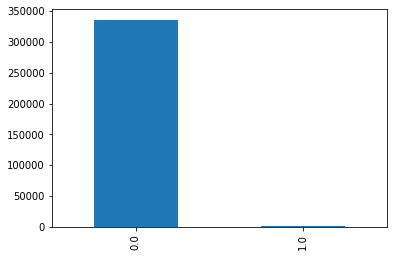

In [0]:
df['DIVERTED'].value_counts().plot(kind='bar')
'''
Code,Description
"0","not diverted"
"1","diverted"
'''

In [0]:
# Since certain carriers have more flights, np.mean will be used instead of np.sum to compare taxi-out durations and other delays
df.groupby('OP_UNIQUE_CARRIER').size()

OP_UNIQUE_CARRIER
9E    10937
AA    54120
AS    12755
B6    14856
DL    50068
EV     7113
F9     5378
G4     1437
HA      541
MQ    12289
NK     8960
OH    11908
OO    31149
UA    39119
WN    50027
YV    10924
YX    14960
dtype: int64

#### (Normalised) Mean Cancellations/Diversions and Arrival Delays versus OP_UNIQUE_CARRIER

Using the same month's data to understand if cancellations and diversions are related to arrival or departure delays-

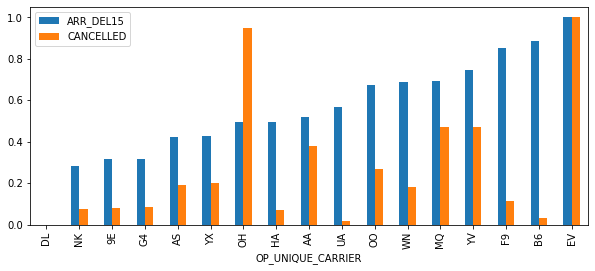

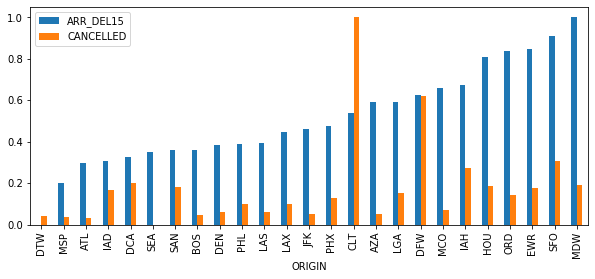

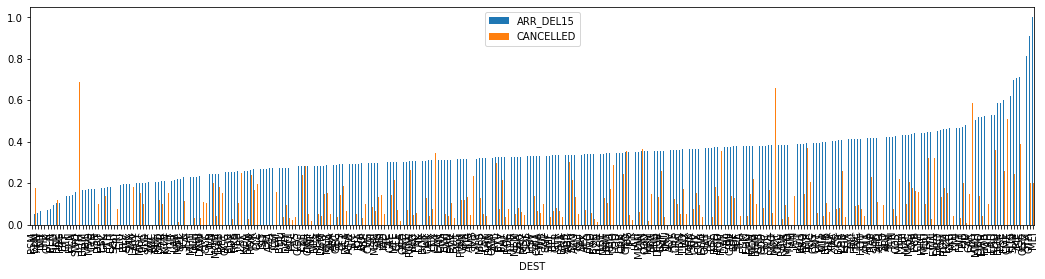

In [0]:
df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['CANCELLED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='ORIGIN', values=['CANCELLED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='DEST', values=['CANCELLED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(18,4), kind='bar')

#### (Normalised) Mean Cancellations/Diversions and Departure Delays versus OP_UNIQUE_CARRIER

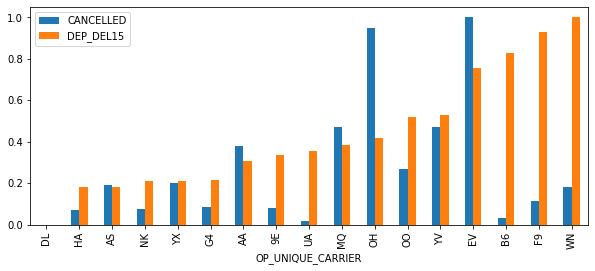

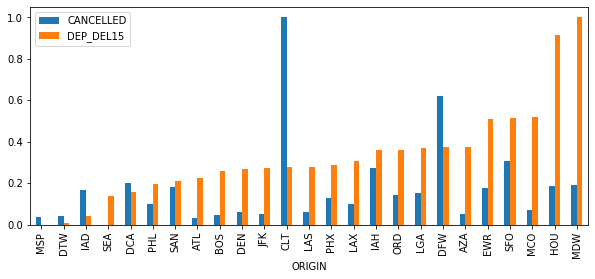

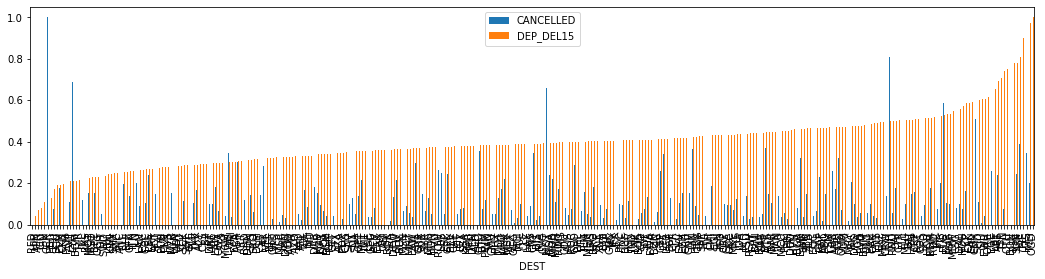

In [0]:
df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['CANCELLED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='ORIGIN', values=['CANCELLED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='DEST', values=['CANCELLED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['CANCELLED'] = (df2['CANCELLED'] - df2['CANCELLED'].min()) / (df2['CANCELLED'].max() - df2['CANCELLED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(18,4), kind='bar')

**Conclusion:** No obvious dependence between cancellation and delays given OP_UNIQUE_CARRIER, ORIGIN or DEST (even after normalising for the difference in order of the number of cancellations and the number of delays)

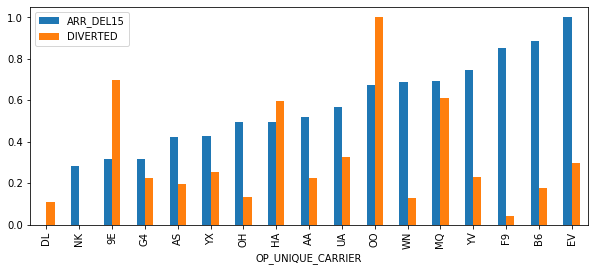

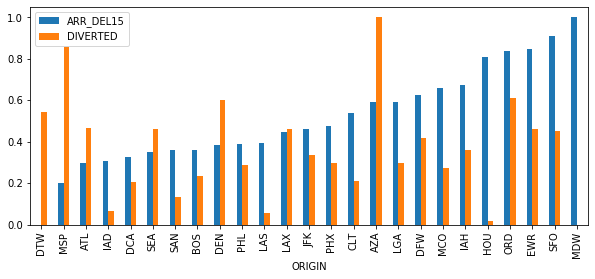

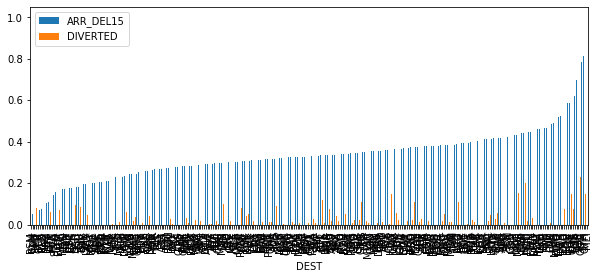

In [0]:
df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['DIVERTED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='ORIGIN', values=['DIVERTED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='DEST', values=['DIVERTED', 'ARR_DEL15'], aggfunc=np.mean)
df2['ARR_DEL15'] = (df2['ARR_DEL15'] - df2['ARR_DEL15'].min()) / (df2['ARR_DEL15'].max() - df2['ARR_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='ARR_DEL15').plot(figsize=(10,4), kind='bar')

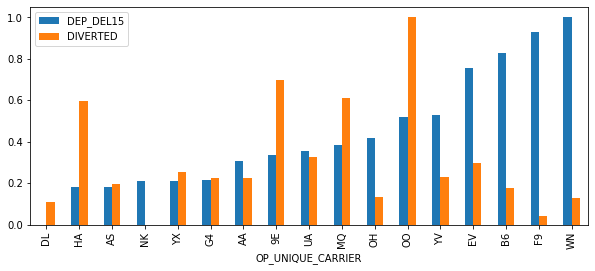

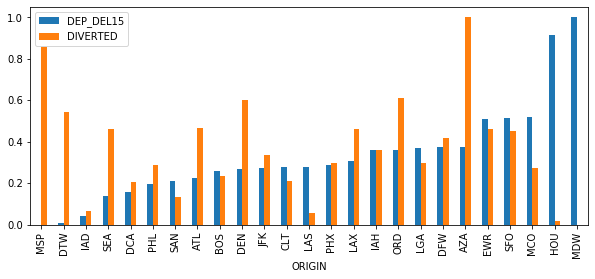

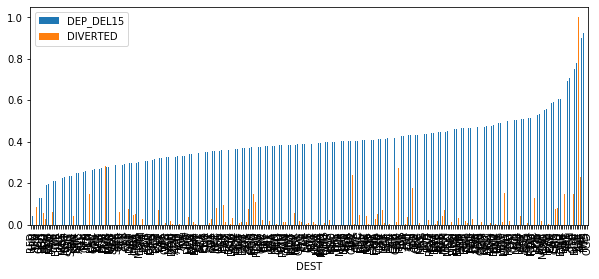

In [0]:
df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['DIVERTED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='ORIGIN', values=['DIVERTED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(10,4), kind='bar')

df2 = pd.pivot_table(df, index='DEST', values=['DIVERTED', 'DEP_DEL15'], aggfunc=np.mean)
df2['DEP_DEL15'] = (df2['DEP_DEL15'] - df2['DEP_DEL15'].min()) / (df2['DEP_DEL15'].max() - df2['DEP_DEL15'].min())
df2['DIVERTED'] = (df2['DIVERTED'] - df2['DIVERTED'].min()) / (df2['DIVERTED'].max() - df2['DIVERTED'].min())
df2.sort_values(by='DEP_DEL15').plot(figsize=(10,4), kind='bar')

**Conclusion:** No obvious dependence between diversion and delays given OP_UNIQUE_CARRIER, ORIGIN or DEST (even after normalising for the difference in order of the number of cancellations and the number of delays)

##Delay Trends for a given carrier

In [0]:
klist = [(i, j) for i in range(3) for j in range(4)]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


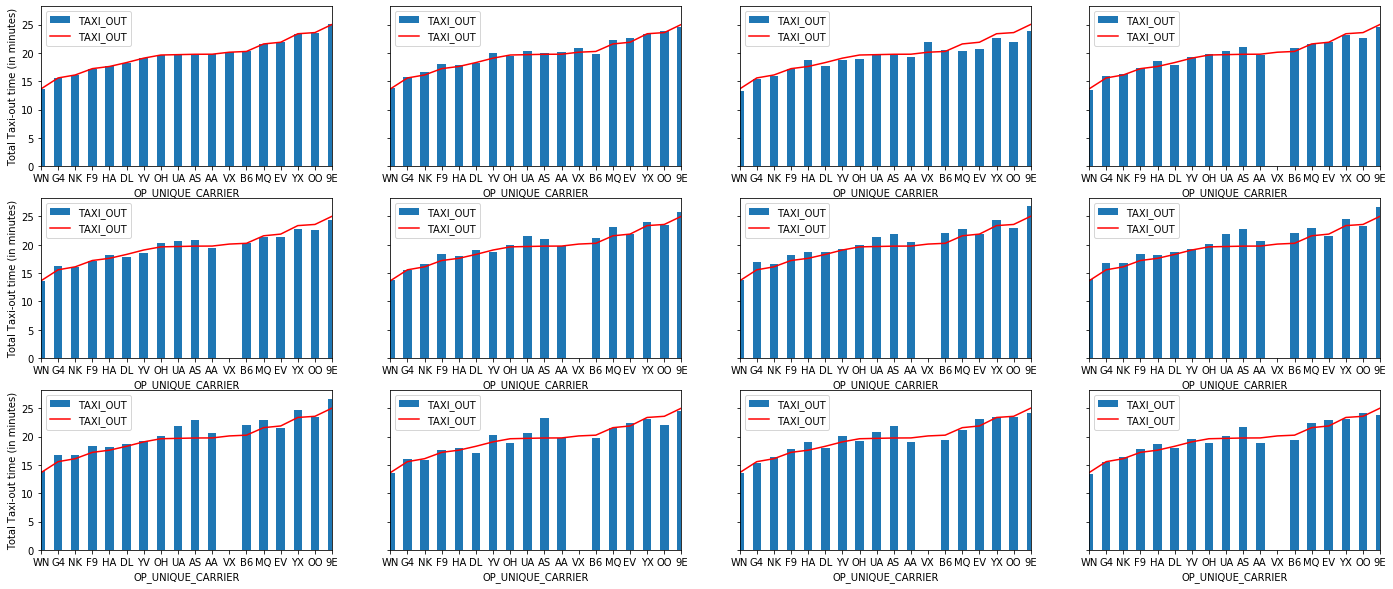

In [0]:
carrier_list = ['WN', 'G4', 'NK', 'F9', 'HA', 'DL', 'YV', 'OH', 'UA', 'AS', 'AA', 'VX', 'B6', 'MQ', 'EV', 'YX', 'OO', '9E']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['TAXI_OUT'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Taxi-out time (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


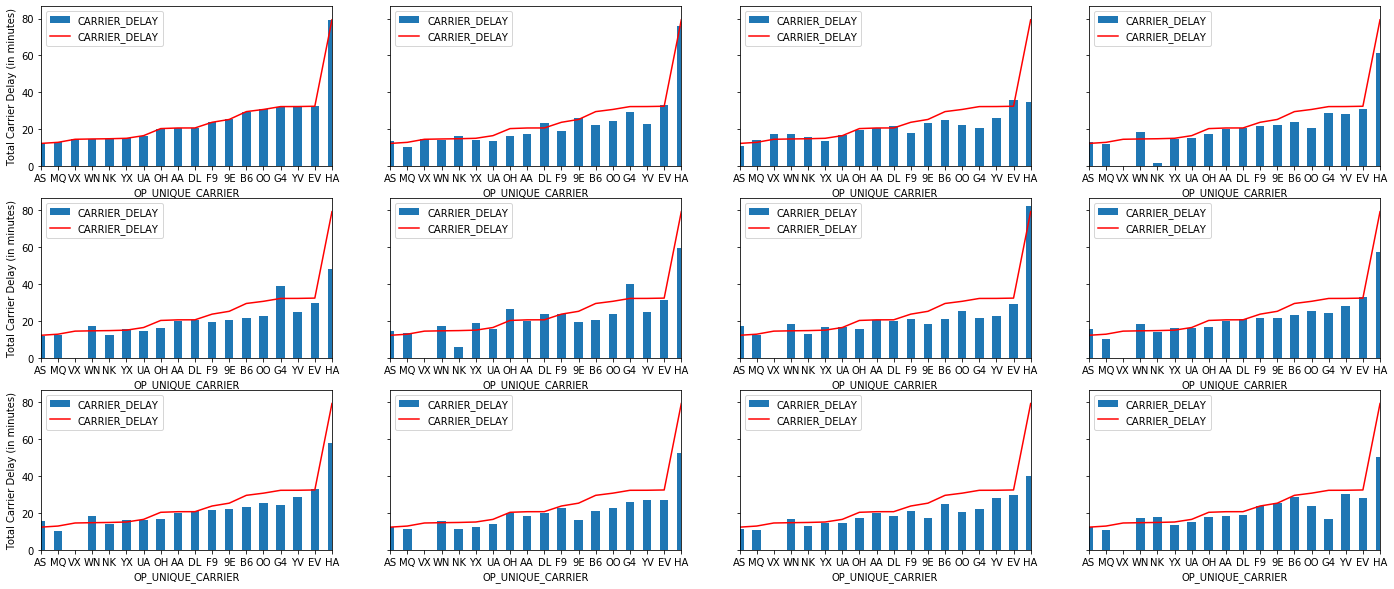

In [0]:
carrier_list = ['AS', 'MQ', 'VX', 'WN', 'NK', 'YX', 'UA', 'OH', 'AA', 'DL', 'F9', '9E', 'B6', 'OO', 'G4', 'YV', 'EV', 'HA']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['CARRIER_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Carrier Delay (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


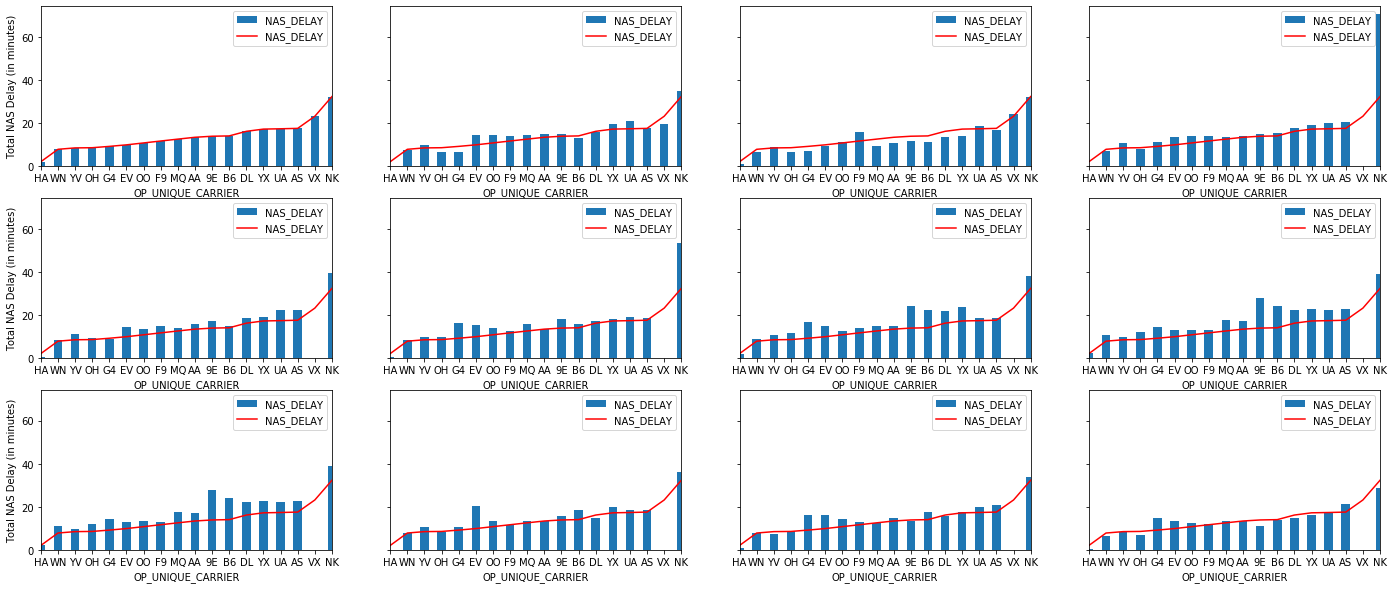

In [0]:
carrier_list = ['HA', 'WN', 'YV', 'OH', 'G4', 'EV', 'OO', 'F9', 'MQ', 'AA', '9E', 'B6', 'DL', 'YX', 'UA', 'AS', 'VX', 'NK']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['NAS_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total NAS Delay (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


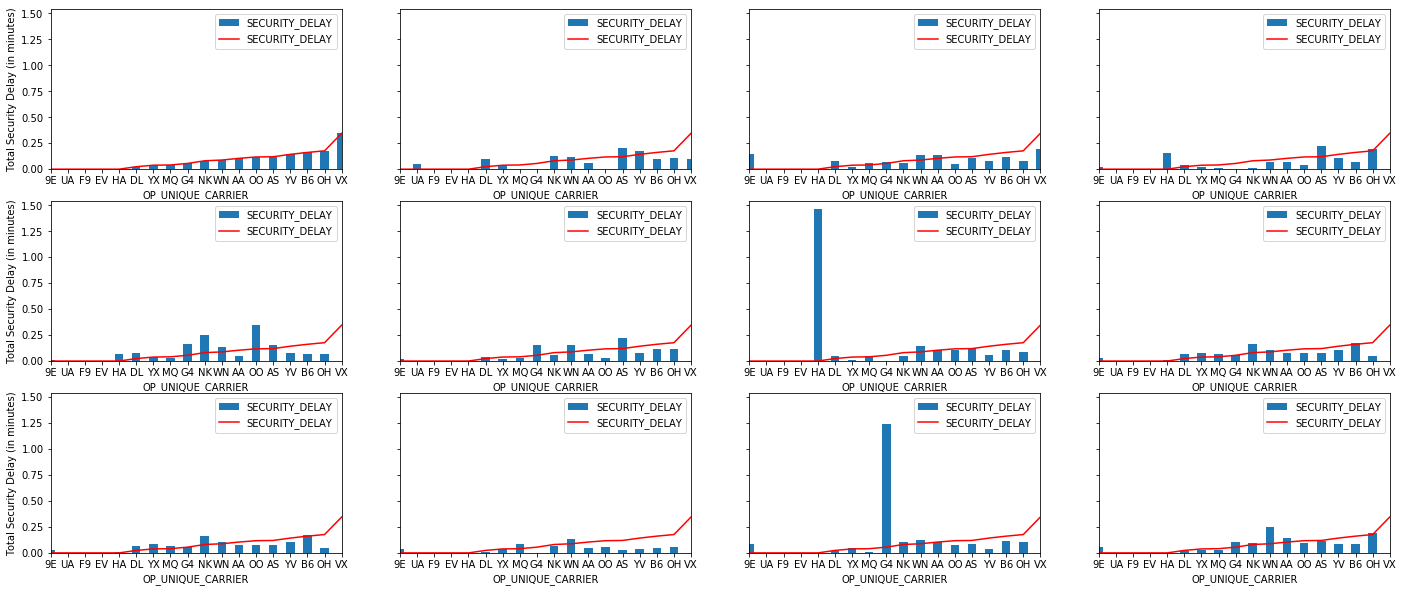

In [0]:
carrier_list = ['9E', 'UA', 'F9', 'EV', 'HA', 'DL', 'YX', 'MQ', 'G4', 'NK', 'WN', 'AA', 'OO', 'AS', 'YV', 'B6', 'OH', 'VX']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['SECURITY_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Security Delay (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


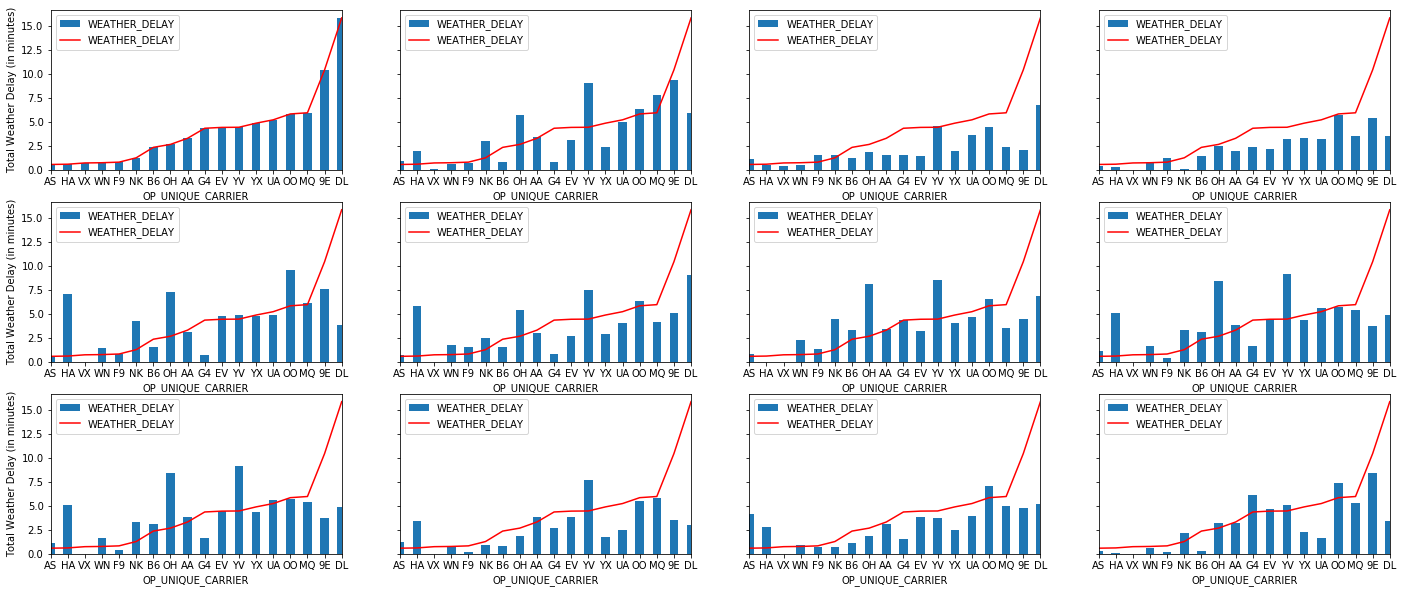

In [0]:
carrier_list = ['AS', 'HA', 'VX', 'WN', 'F9', 'NK', 'B6', 'OH', 'AA', 'G4', 'EV', 'YV', 'YX', 'UA', 'OO', 'MQ', '9E', 'DL']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['WEATHER_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp=df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Weather Delay (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


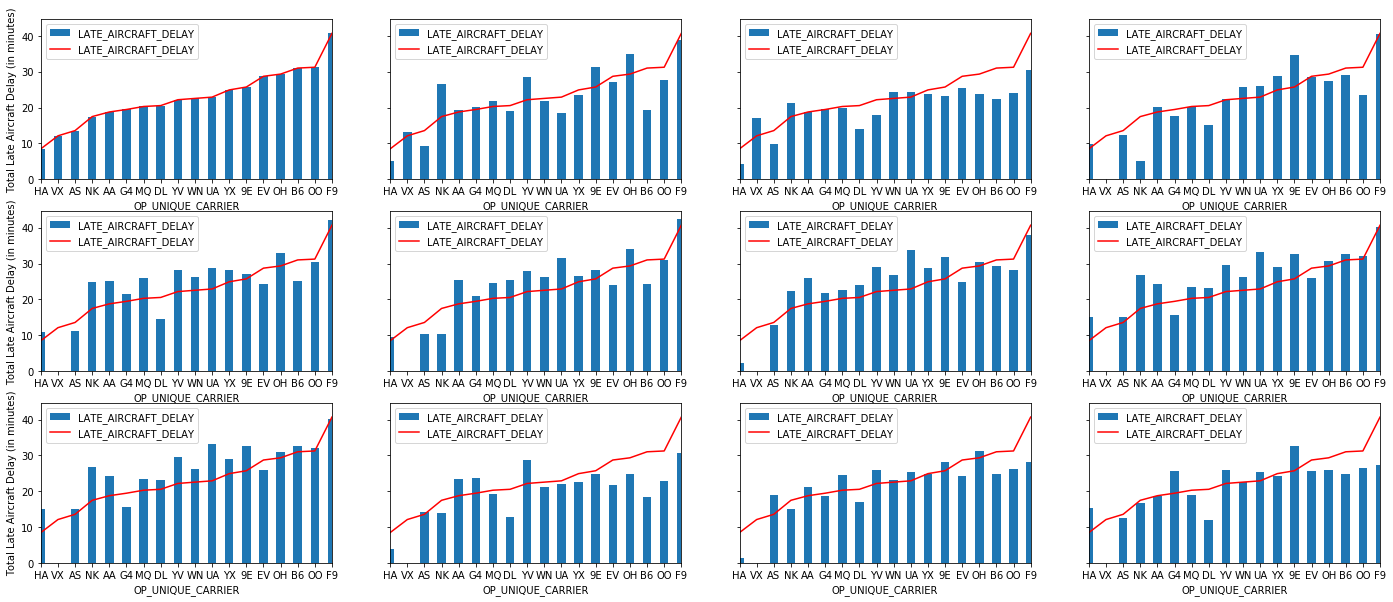

In [0]:
carrier_list = ['HA', 'VX', 'AS', 'NK', 'AA', 'G4', 'MQ', 'DL', 'YV', 'WN', 'UA', 'YX', '9E', 'EV', 'OH', 'B6', 'OO', 'F9']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['LATE_AIRCRAFT_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Late Aircraft Delay (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


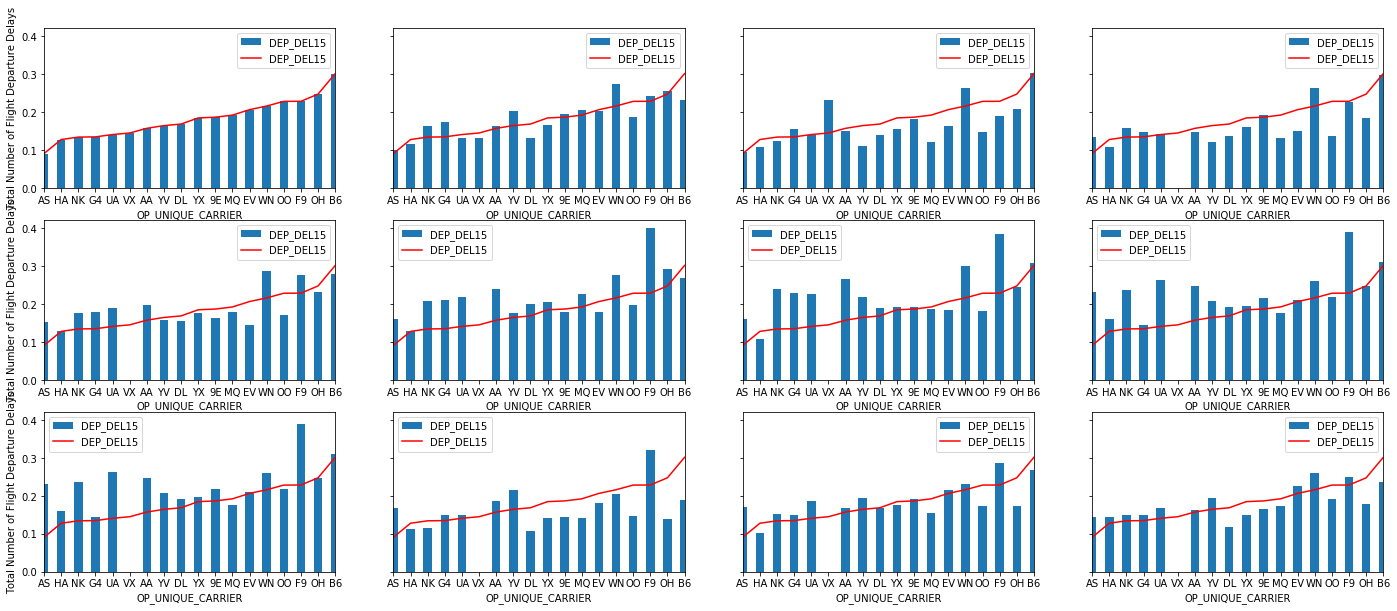

In [0]:
carrier_list = ['AS', 'HA', 'NK', 'G4', 'UA', 'VX', 'AA', 'YV', 'DL', 'YX', '9E', 'MQ', 'EV', 'WN', 'OO', 'F9', 'OH', 'B6']
filenames = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=4, sharey=True)

for index in range(12):
  path = "/content/drive/My Drive/PROJECT 1001/Data2/new_" + filenames[index] + ".csv"
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df, index='OP_UNIQUE_CARRIER', values=['DEP_DEL15'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Number of Flight Departure Delays')

**Conclusions:**

*   Mean TAXI_OUT, CARRIER_OUT, and NAS_DELAY, for a given carrier, show similar trends over all months.
*   Mean SECURITY_DELAY, WEATHER_DELAY, LATE_AIRCRAFT_DELAY and DEP_DEL15, for a given carrier, do not show similar trends over all months.

###Check if the delays follow the same trend for every day of the week for a given carrier

####Following codes can be run separately for each month by changing the path variable

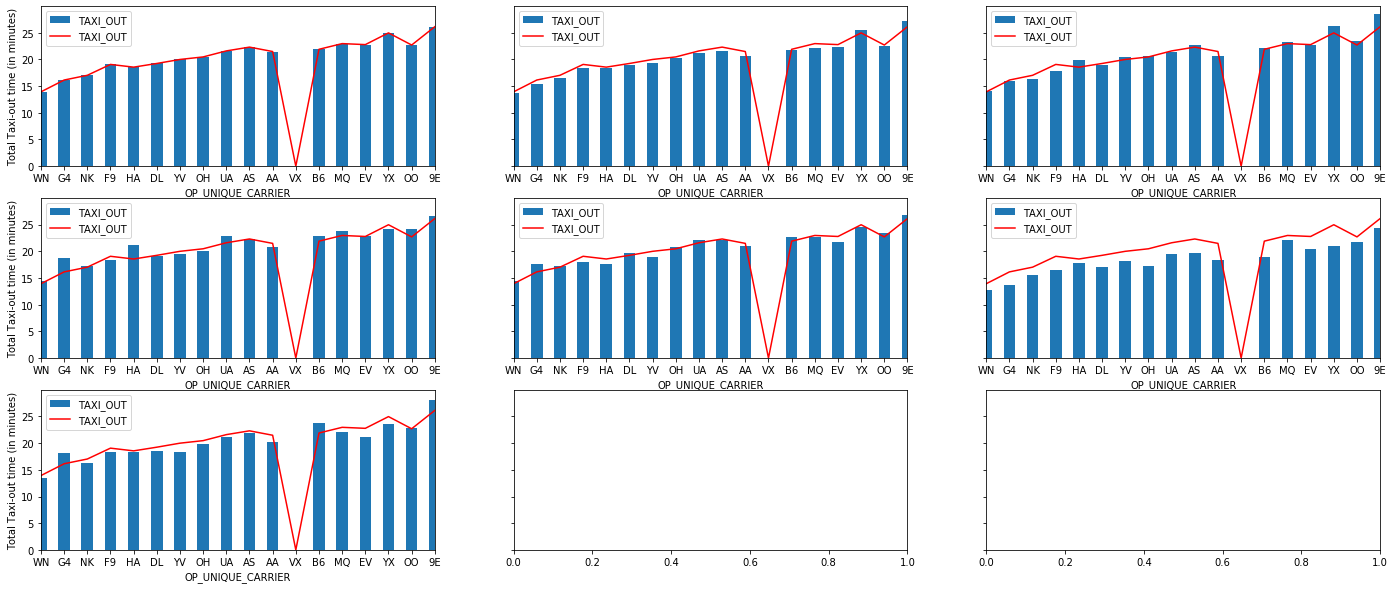

In [0]:
klist = [(i, j) for i in range(3) for j in range(3)]
carrier_list = ['WN', 'G4', 'NK', 'F9', 'HA', 'DL', 'YV', 'OH', 'UA', 'AS', 'AA', 'VX', 'B6', 'MQ', 'EV', 'YX', 'OO', '9E']
path = "/content/drive/My Drive/PROJECT 1001/Data2/new_jul.csv"
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=3, sharey=True)

for index in range(7):
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df[df['DAY_OF_WEEK']==index+1], index='OP_UNIQUE_CARRIER', values=['TAXI_OUT'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Taxi-out time (in minutes)')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


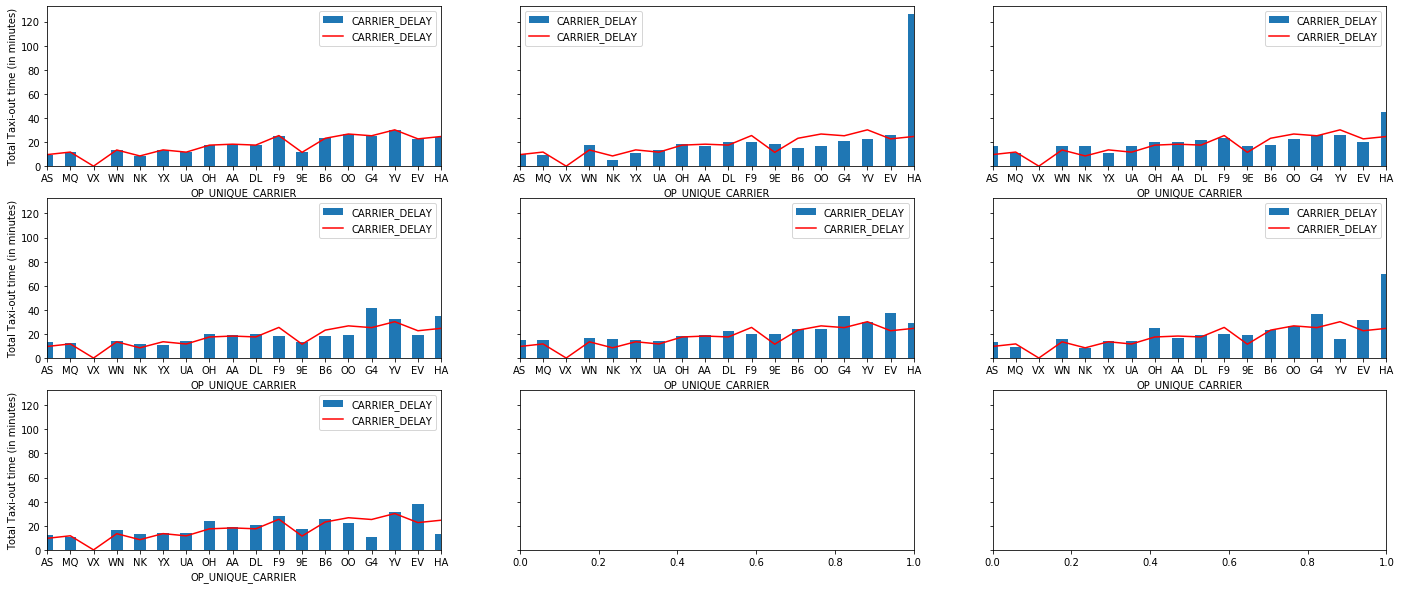

In [0]:
klist = [(i, j) for i in range(3) for j in range(3)]
carrier_list = ['AS', 'MQ', 'VX', 'WN', 'NK', 'YX', 'UA', 'OH', 'AA', 'DL', 'F9', '9E', 'B6', 'OO', 'G4', 'YV', 'EV', 'HA']
path = "/content/drive/My Drive/PROJECT 1001/Data2/new_oct.csv"
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=3, sharey=True)

for index in range(7):
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df[df['DAY_OF_WEEK']==index+1], index='OP_UNIQUE_CARRIER', values=['CARRIER_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Taxi-out time (in minutes)')

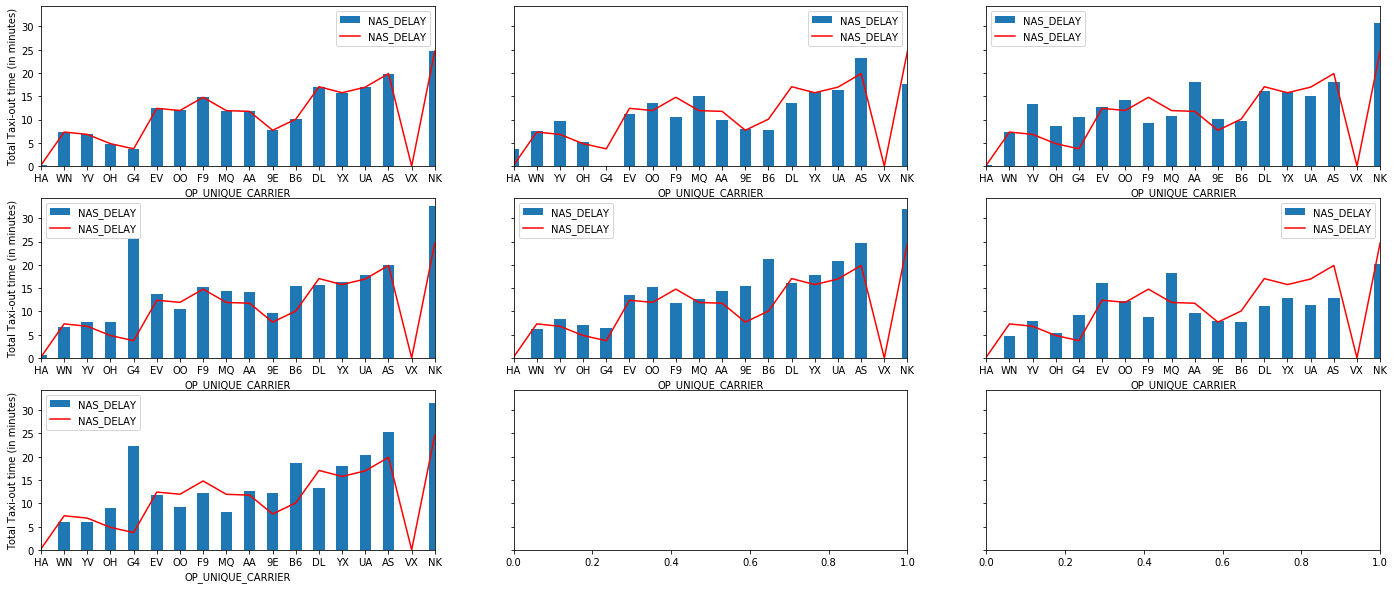

In [0]:
klist = [(i, j) for i in range(3) for j in range(3)]
carrier_list = ['HA', 'WN', 'YV', 'OH', 'G4', 'EV', 'OO', 'F9', 'MQ', 'AA', '9E', 'B6', 'DL', 'YX', 'UA', 'AS', 'VX', 'NK']
path = "/content/drive/My Drive/PROJECT 1001/Data2/new_dec.csv"
fig, axes = plt.subplots(figsize=(24,10), nrows=3, ncols=3, sharey=True)

for index in range(7):
  i, j = klist[index]
  df = pd.read_csv(path)
  df2 = pd.pivot_table(df[df['DAY_OF_WEEK']==index+1], index='OP_UNIQUE_CARRIER', values=['NAS_DELAY'], aggfunc=np.mean)
  if 'VX' not in df2.index:
    df2.loc['VX'] = 0
  if index==0:
    temp = df2
  df2.reindex(carrier_list).plot(kind='bar', ax=axes[i, j])
  temp.reindex(carrier_list).plot(kind='line', ax=axes[i, j], color='r')
  axes[i, j].set_ylabel('Total Taxi-out time (in minutes)')